Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Load dataset 

In [97]:
features = pd.read_fwf('features.txt', header=None)
X_train1 = pd.read_fwf('X_train.txt', header=None)
y_train1 = pd.read_fwf('y_train.txt', header=None)
X_test1 = pd.read_fwf('X_test.txt', header=None)
y_test1 = pd.read_fwf('y_test.txt', header=None)
y = y_train1.append(y_test1)
X = X_train1.append(X_test1)

Exploring Dataset

In [81]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 44.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Data columns (total 1 columns):
0    10299 non-null int64
dtypes: int64(1)
memory usage: 160.9 KB
None


Splitting dataset into Training Set and Test Set

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Normalizing the features

In [87]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Create Python dictionary using [] or dict()

In [88]:
Best_Score = []

## Random Forest

In [89]:
M1 = RandomForestClassifier()
grid_param = {  
    
    'n_estimators': range(5,25),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
    
}

gd_sr = GridSearchCV(estimator=M1, param_grid=grid_param, scoring='accuracy', cv=2, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
Best_Score.append(gd_sr.best_score_)
print('Random Forest best parameter :', gd_sr.best_params_)  
print('Random Forest best Accuracy:', gd_sr.best_score_)
print('Random Fores average Accuracy:', np.average(gd_sr.cv_results_['mean_test_score']))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random Forest best parameter : {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 24}
Random Forest best Accuracy: 0.9717020391177694
Random Fores average Accuracy: 0.9611752670273269


## Logistic Regression

In [90]:
M2 = LogisticRegression()
grid_param1 = {  
    
    'penalty': ['l1', 'l2'],
    'random_state': [None, 0]
    
}
gd_sr1 = GridSearchCV(estimator=M2, param_grid=grid_param1, scoring='accuracy', cv=2, n_jobs=-1)
gd_sr1.fit(X_train, y_train) 
Best_Score.append(gd_sr1.best_score_)
print('Logistic best parameter :', gd_sr1.best_params_)  
print('Logistic best Accuracy:', gd_sr1.best_score_)
print('Logistic average Accuracy:', np.average(gd_sr1.cv_results_['mean_test_score']))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic best parameter : {'penalty': 'l1', 'random_state': None}
Logistic best Accuracy: 0.9797475377999723
Logistic average Accuracy: 0.9787418504646969


## Support Vector Machine

In [91]:
M3 = SVC()

grid_param2 = {  
    
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],  
    'degree': [3, 4, 5, 6],
    'random_state': [None, 0]
}
gd_sr2 = GridSearchCV(estimator=M3, param_grid=grid_param2, scoring='accuracy', cv=2, n_jobs=-1)
gd_sr2.fit(X_train, y_train) 
Best_Score.append(gd_sr2.best_score_)
print('SVM best parameter :', gd_sr2.best_params_)  
print('SVM Accuracy:', gd_sr2.best_score_)
print('Logistic best average Accuracy:', np.average(gd_sr2.cv_results_['mean_test_score']))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM best parameter : {'degree': 3, 'kernel': 'linear', 'random_state': None}
SVM Accuracy: 0.9773893743931197
Logistic best average Accuracy: 0.9120803856290747


## K-Nearest Neighbors

In [92]:
M4 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

grid_param3 = {  
    
    'n_neighbors': [3, 4, 5, 6, 7, 20],  
    'weights': ['uniform', 'distance']
    
}

gd_sr3 = GridSearchCV(estimator=M4, param_grid=grid_param3, scoring='accuracy', cv=2, n_jobs=-1)
gd_sr3.fit(X_train, y_train) 
Best_Score.append(gd_sr3.best_score_)
print('Knn best parameter :', gd_sr3.best_params_)  
print('Knn best Accuracy:', gd_sr3.best_score_)
print('Logistic average Accuracy:', np.average(gd_sr2.cv_results_['mean_test_score']))


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Knn best parameter : {'n_neighbors': 6, 'weights': 'distance'}
Knn best Accuracy: 0.9492301290054099
Logistic average Accuracy: 0.9120803856290747


Naive Bayes

In [99]:
M5 = GaussianNB()

grid_param5 = {  
    
    'priors': [None],  
    
}

gd_sr5 = GridSearchCV(estimator=M5, param_grid=grid_param5, scoring='accuracy', cv=2, n_jobs=-1)
gd_sr5.fit(X_train, y_train) 
Best_Score.append(gd_sr5.best_score_)
print('Knn best parameter :', gd_sr5.best_params_)  
print('Knn best Accuracy:', gd_sr5.best_score_)
print('Logistic average Accuracy:', np.average(gd_sr5.cv_results_['mean_test_score']))


Knn best parameter : {'priors': None}
Knn best Accuracy: 0.7493411014010265
Logistic average Accuracy: 0.7493411014010265


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Visualize Model Performance

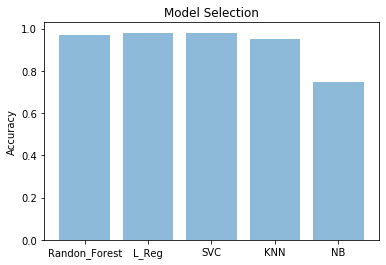

In [101]:
objects = ('Randon_Forest', 'L_Reg', 'SVC', 'KNN','NB')
y_pos = np.arange(len(objects))

plt.bar(y_pos, Best_Score, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Selection')

plt.show()

Cased on the model evaluation, linear regression model has the highest accuracy rate. Reduce dimension of dataset by using PCA 

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

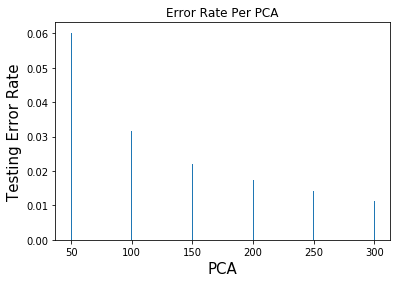

In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

PCA_Range = [5,4,3,2]

# We can create Python dictionary using [] or dict()
scores = []
range2 = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in PCA_Range:
    pipe_lr = make_pipeline(PCA(n_components=k), RandomForestClassifier(n_estimators = 10, criterion = 'gini', bootstrap = True))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    scores.append(1-(pipe_lr.score(X_test,y_test)))
    range2.append(k)
    
    
#visualize error rate per PCA   
plt.bar(range2, scores)
plt.xlabel('PCA', fontsize=15)
plt.ylabel('Testing Error Rate', fontsize=15)
plt.xticks(range2, fontsize=10)
plt.title('Error Rate Per PCA')
plt.show()

Build Final Model Pipeline, Evaluate accuracy and visualize confusion matrix

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.987


Text(0.5, 15.0, 'Predicted label')

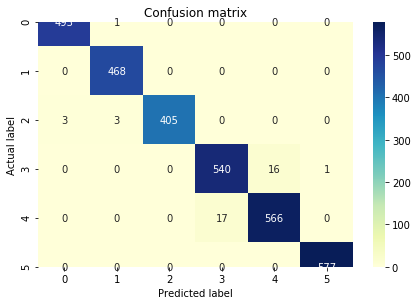

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Build Final Model Pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=300), Imputer(missing_values=np.nan, strategy='mean'), LogisticRegression(penalty = 'l1', random_state=None))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

#Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4,5,6] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')